In [1]:
# Install Libs
#! pip install python-binance

# Source / Documentation : 
# https://github.com/sammchardy/python-binance/tree/master

In [2]:
from binance.client import Client
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Example usage (Date Format: Year-Month-Day)
ticker = 'ETHUSDT'
start_date = '2024-09-20'
end_date = '2024-09-25'
interval = '1m' #1m -> minutes; h -> hours; d -> days; w -> weeks; M -> months

In [4]:
client = Client('', '')

In [5]:
klines = client.get_historical_klines(ticker, interval, start_date, end_date)

In [6]:
klines[0]

[1726790400000,
 '2465.21000000',
 '2466.67000000',
 '2465.20000000',
 '2466.67000000',
 '131.47080000',
 1726790459999,
 '324217.48468600',
 1770,
 '73.78120000',
 '181949.32943900',
 '0']

In [8]:
# Create a DataFrame from the klines
df = pd.DataFrame(klines, columns=[
                                    'open_time','open', 'high', 'low', 'close',
                                        'volume','close_time', 'dv','num_trades',
                                        'taker_buy_vol','taker_buy_base_vol', 'ignore'
                                ])

# Set Close time to datetime Type and as index
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
df.set_index('close_time', inplace=True)
df.drop(columns=['open_time','ignore'], inplace=True)

# Round close time to normalize
df.index = df.index.round('min')

# Convert columns to float type
df = df.astype(float)

# Print
df


,open,high,low,close,volume,dv,num_trades,taker_buy_vol,taker_buy_base_vol
close_time,,,,,,,,,
2024-09-20 00:01:00,2465.21,2466.67,2465.20,2466.67,131.4708,324217.484686,1770.0,73.7812,181949.329439
2024-09-20 00:02:00,2466.67,2467.16,2466.17,2466.66,116.9774,288546.274681,2079.0,61.3501,151321.641780
2024-09-20 00:03:00,2466.65,2467.17,2466.40,2467.16,70.5308,173997.823044,1657.0,33.4646,82555.032926
2024-09-20 00:04:00,2467.16,2467.16,2464.19,2464.24,230.9532,569302.984217,3305.0,154.8455,381651.866285
2024-09-20 00:05:00,2464.24,2466.19,2463.73,2466.19,268.8074,662617.759862,2147.0,249.5442,615132.765101
...,...,...,...,...,...,...,...,...,...
2024-09-24 23:57:00,2654.20,2654.70,2653.59,2654.19,73.3455,194663.011606,1319.0,52.2566,138690.709003
2024-09-24 23:58:00,2654.20,2655.07,2654.20,2654.65,62.7538,166599.507935,1048.0,42.3049,112310.157332
2024-09-24 23:59:00,2654.65,2654.65,2653.00,2653.13,61.7841,163970.746385,605.0,3.3464,8882.998616


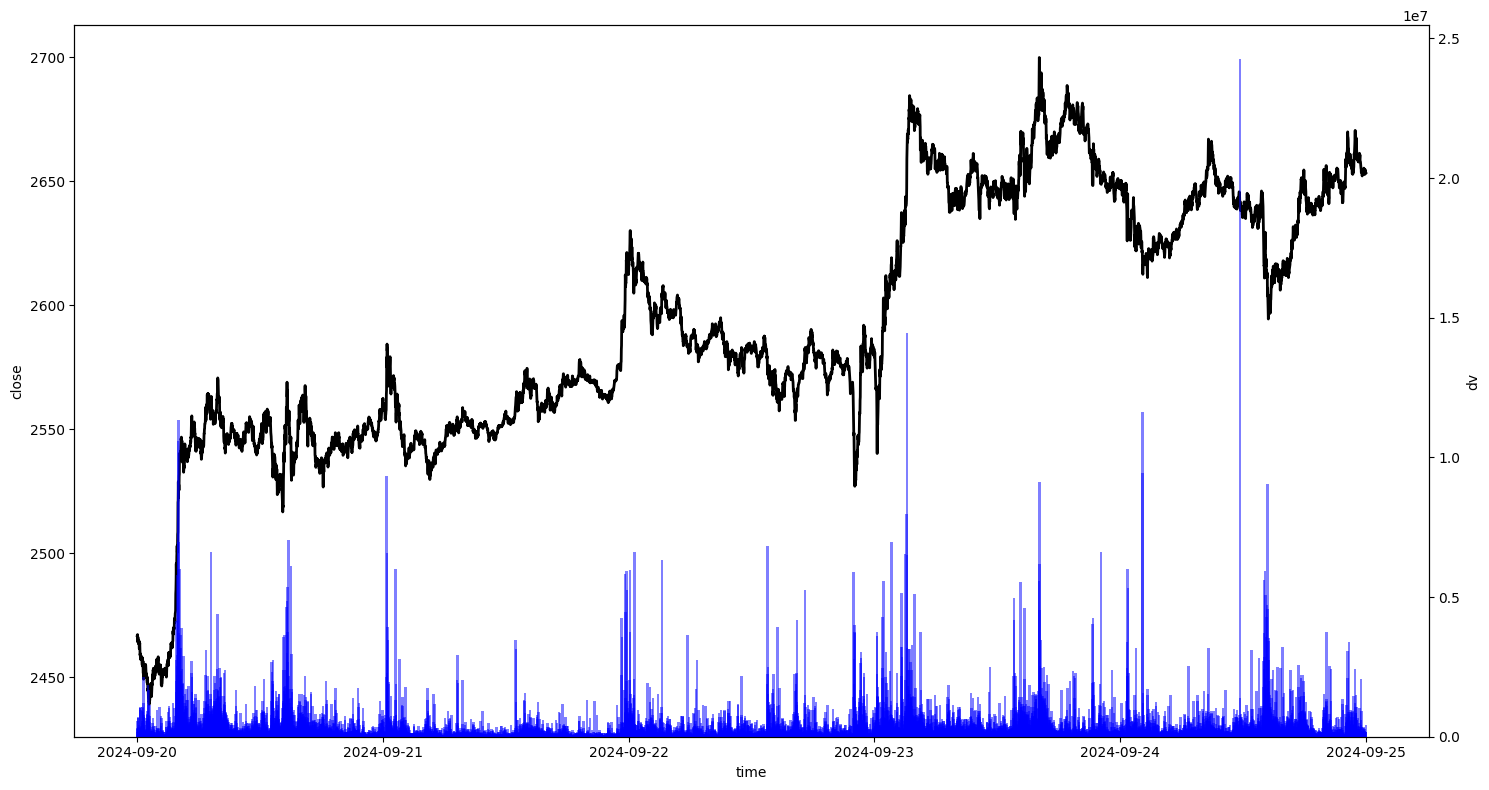

In [9]:
#Affichage du prix 'close' et du volume en dollar 'dv' 
fig, ax1 = plt.subplots(figsize=(15, 8))
#Price
ax1.set_xlabel('time')
ax1.set_ylabel('close')
ax1.plot(df.index, df['close'], color='black', linewidth=2)
ax1.tick_params(axis='y')
#Volume
ax2 = ax1.twinx()
ax2.set_ylabel('dv')
ax2.bar(df.index, df['dv'], color='blue', width=0.01, alpha=0.5)
ax2.tick_params(axis='y')
#Show
fig.tight_layout()
plt.show()

In [11]:
### STORE RAW DATA ###
hdf5filename = ticker + '_' + interval + '_' + start_date + '_' + end_date + '.h5'
df.to_hdf(hdf5filename, key='ohlcv', mode='w')